---
title: Kmeans Clustering. 

format: html
---

## K Means for detecting forged banknote
Today many Banks in the world are introducing features to improve their banknote's security and actual forgeries can recreate watermarks, metal threads or even holographic features, Modern data science can help Banks identify fake notes more efficiently and take them out of general circulation.
K-means is an unsupervised classification algorithm where data is categorized based on similarity; it's widely used in medical studies and traffic behavior thanks to its effectiveness in dealing with images.
This project proposes a K-means model for classifications of genuine and forged banknotes using extracting features from images by a Wavelet transform tool. “The Wavelets are generally sufficient to analyze data fully”


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

## Data Exploration and pre-procesing

In [16]:
file_to_read="data_full_banknote.txt"
df_full_banknote=pd.read_csv(file_to_read)
# delete duplicated there is not null values
df_full_banknote= df_full_banknote.drop_duplicates()
# put the headers
df_full_banknote.columns=["V1", "V2", "V3", "V4", "class"]
df_full_banknote.drop(["V3", "V4"],axis=1, inplace=True)
missing_data = df_full_banknote.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


V1
False    1347
Name: V1, dtype: int64

V2
False    1347
Name: V2, dtype: int64

class
False    1347
Name: class, dtype: int64



## Modeling

#### Using train-test-split function from sklearn. Training: 80% and test: 20%

In [17]:
df_train_Kmeans, df_test_kmeans = train_test_split(df_full_banknote, test_size = 0.20)
print("data to train kmeans: ", len(df_train_Kmeans))
print("data to test kmean: ", len(df_test_kmeans))

data to train kmeans:  1077
data to test kmean:  270


In [18]:
df_train_Kmeans.drop(["class"],axis=1, inplace=True)
np_train_kmeans=np.array(df_train_Kmeans)

#### Applying Elbow and Silhouette to find numbers of clusters, and plot real dataset to compare data. 

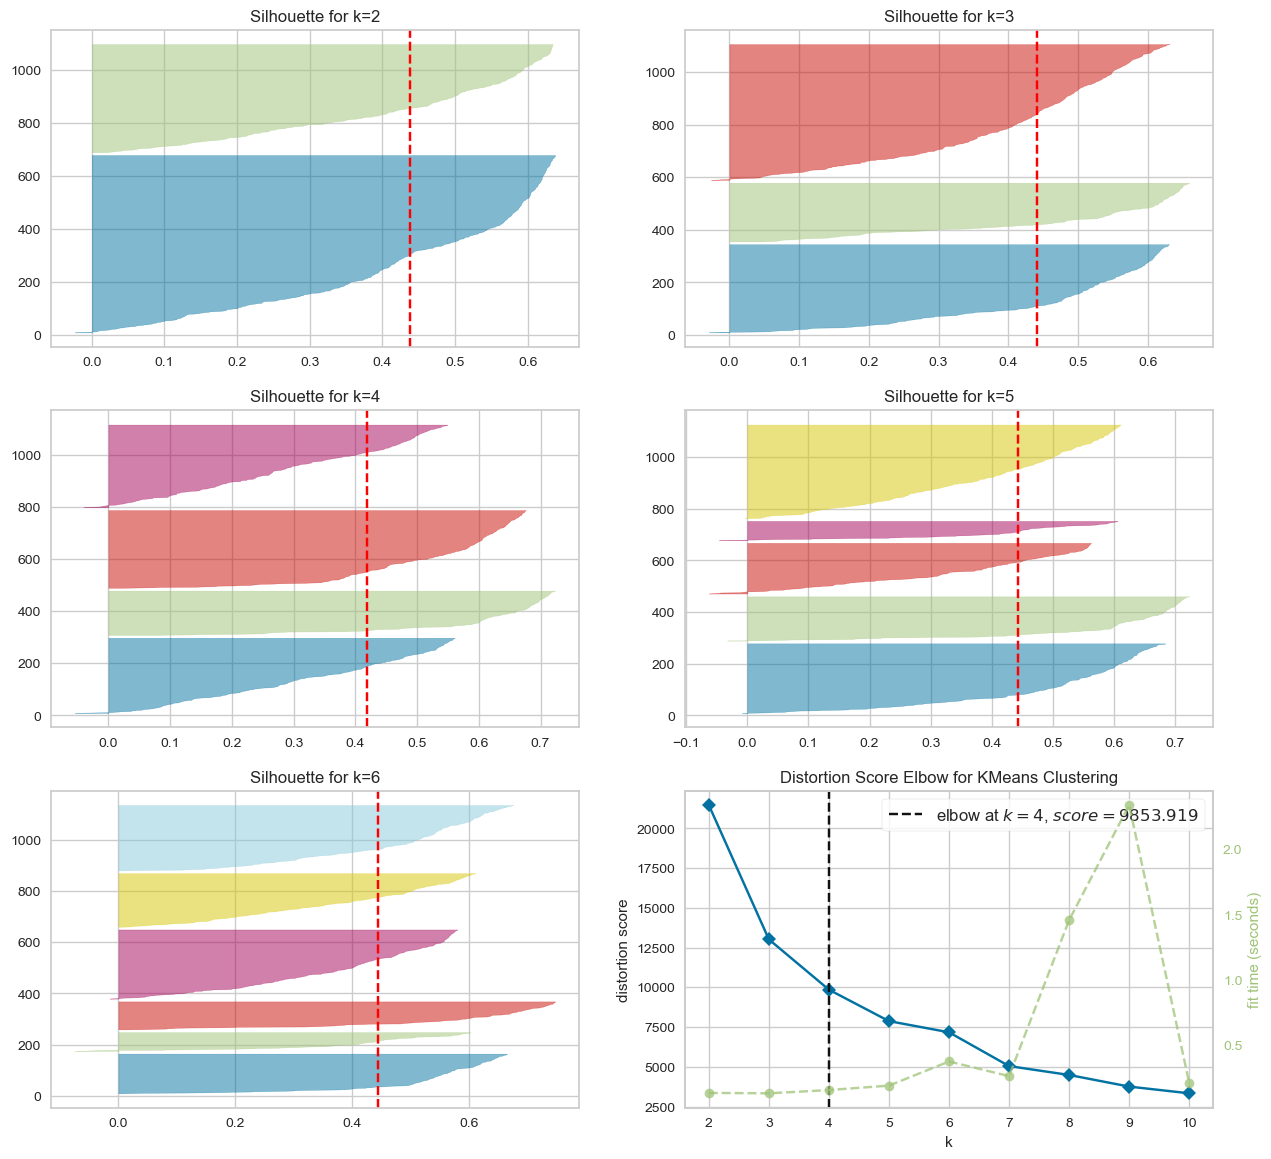

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# create arrays  to plot scatter with genuine and forged
df_genuino=np.array(df_full_banknote[df_full_banknote["class"]==1])
df_false=np.array(df_full_banknote[df_full_banknote["class"]==0])
# 
X= df_train_Kmeans
  
fig, ax = plt.subplots(3, 2, figsize=(15,14))
for i in [2, 3, 4, 5, 6]:
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=None, tol=0.000001)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 
   
km = KMeans(n_init="auto")
visualizer = KElbowVisualizer(km)
visualizer.fit(X)  


ax[0, 0].set_title("Silhouette for k=2")
ax[0, 1].set_title("Silhouette for k=3")
ax[1, 0].set_title("Silhouette for k=4")
ax[1, 1].set_title("Silhouette for k=5")
ax[2, 0].set_title("Silhouette for k=6")
ax[2, 1].set_title("Distortion score Elbow")

visualizer.show()

In [20]:
kmeans = KMeans(n_clusters=5,init="k-means++", n_init=10, max_iter=100, random_state=None, tol=0.000001).fit(np_train_kmeans)
n_clusters=kmeans.labels_
clusters= kmeans.cluster_centers_

np_bank=np.column_stack((n_clusters, np_train_kmeans))
df_bank=pd.DataFrame(np_bank)

df_bank.columns=("n_cluster", "V1", "V2")

## Evaluation

In [21]:
df_train_all=pd.merge(df_full_banknote, df_bank, on=["V1", "V2"], how="left")


<function matplotlib.pyplot.show(close=None, block=None)>

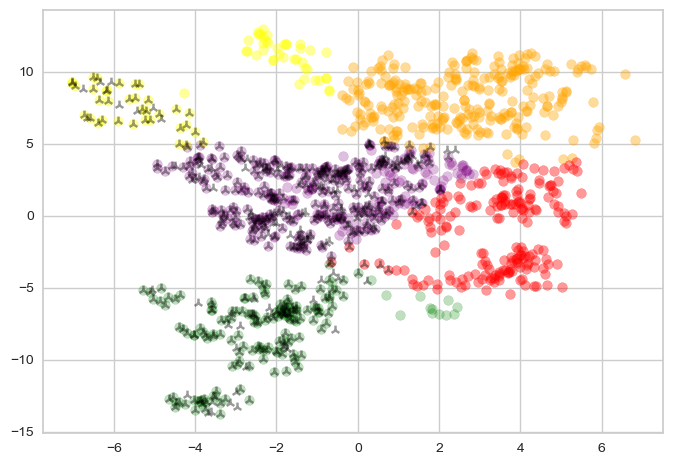

In [22]:
#plot clusters by color and forged are black

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
cluster5=df_bank[df_bank["n_cluster"]==4]

plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.25)
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.25)
plt.scatter(cluster3["V1"], cluster3["V2"], c="orange", alpha=0.40)
plt.scatter(cluster4["V1"], cluster4["V2"], c="yellow", alpha=0.40)
plt.scatter(cluster5["V1"], cluster5["V2"], c="red", alpha=0.40)
# forged banknote in red

df_forged=df_train_all[df_train_all["class"]==1]

plt.scatter(df_forged["V1"], df_forged["V2"], c="black", alpha=0.40, marker="2")

plt.show

## Interpretation of the results

0.67886 4.1199 1
-1.3971 3.3191 1
-3.1875 -7.5756 1
1.0987 0.6394 0
-0.40804 0.54214 1


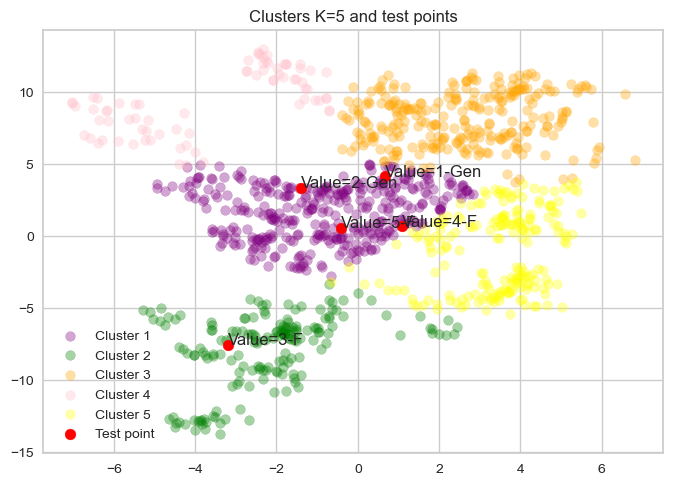

In [23]:

cluster1=df_bank[df_bank["n_cluster"]==0]
cluster2=df_bank[df_bank["n_cluster"]==1]
cluster3=df_bank[df_bank["n_cluster"]==2]
cluster4=df_bank[df_bank["n_cluster"]==3]
cluster5=df_bank[df_bank["n_cluster"]==4]

plt.scatter(cluster1["V1"], cluster1["V2"], c="purple", alpha=0.35, label="Cluster 1")
plt.scatter(cluster2["V1"], cluster2["V2"], c="green", alpha=0.35, label="Cluster 2")
plt.scatter(cluster3["V1"], cluster3["V2"], c="orange", alpha=0.35, label="Cluster 3")
plt.scatter(cluster4["V1"], cluster4["V2"], c="pink", alpha=0.35, label="Cluster 4")
plt.scatter(cluster5["V1"], cluster5["V2"], c="yellow", alpha=0.35, label="Cluster 5")


plt.scatter(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], c="red", s=60, marker="o", label="Test point")
plt.scatter(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], c="red", s=60, marker="o")
plt.scatter(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], c="red", s=60, marker="o")

plt.text(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], "Value=1-Gen")
plt.text(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], "Value=2-Gen")
plt.text(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], "Value=3-F")
plt.text(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], "Value=4-F")
plt.text(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], "Value=5-F")

plt.legend(loc="lower left")
plt.title("Clusters K=5 and test points")
plt.show

print(df_test_kmeans.iloc[10,0], df_test_kmeans.iloc[10,1], df_test_kmeans.iloc[10,2])
print(df_test_kmeans.iloc[20,0], df_test_kmeans.iloc[20,1], df_test_kmeans.iloc[20,2])
print(df_test_kmeans.iloc[40,0], df_test_kmeans.iloc[40,1], df_test_kmeans.iloc[40,2])
print(df_test_kmeans.iloc[50,0], df_test_kmeans.iloc[50,1], df_test_kmeans.iloc[50,2])
print(df_test_kmeans.iloc[60,0], df_test_kmeans.iloc[60,1], df_test_kmeans.iloc[60,2])

### Results
- The five clusters are represented on the scatter with different colors and each cluster has
been assigned a number.
- In addition to the clusters found for the model, the forged data set is graphed, using the
marker=+ and the color black. The forgets were obtained from the original dataset with a value
of 1.
- In clusters 1 and 3 it’s observed that all the banknotes are entirely Genuine.
- The graph also shows some points used to test the model, and it can be noted that in
cluster 2, 4,5 it is very difficult to define if the banknote is Genuine or Forge. This means that
the prediction percentage for Genuines in the model obtained is not high. Clusters 2 ,4 and 5
therefore represent a weakness of the model created, due to the mixture of Genuine and Forge
data.

## Recomendations:

*Initial centroids weakness is well known that the results of the modeling always depend on the initial values,
Kmeans++ to initialize clusters was used to mitigate this weakness . The values of genuine
and false are also plotted to visually interpret which cluster includes the genuine and which
the forged, based on the parameters chosen many changes were applied over and over
and the results always depend on the initial values, even varied a lot from one number of k
to another.
-2- Predict using Clusters
Despite the fact that in chosen points to test, the prediction exactly coincides with its value.
The accuracy was 100 % Clusters 2, 4, 5 represents a weakness in the model, due to the
mixture of Genuine and Forge data.
It is because of this that it is proposed to increase the dimensionality of the model to avoid
this problem in cluster three, that is, to choose more variables to train the model.
KMeans is possible to detect counterfeit bills with a trained model but it would be
good to investigate with other variables.*
